In [ ]:
# The dataset we are working on are the csv files of various crypto currencies and their prices. we found it on the internet on a website while exploring.
# The topic is based upon making a model which can predict the pices with a high accuracy

# We have used the LSTM because it is great for sequence and prediction tasks due to its capability to capture long-term dependencies

In [ ]:
from google.colab import drive # mounting drive where the data is present
drive.mount('/CoinData')

Mounted at /CoinData


In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file

import os
for dirname, _, filenames in os.walk('/CoinData/MyDrive/CoinData1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/CoinData/MyDrive/CoinData1/coin_Ethereum.csv
/CoinData/MyDrive/CoinData1/coin_Iota.csv
/CoinData/MyDrive/CoinData1/coin_ChainLink.csv
/CoinData/MyDrive/CoinData1/coin_Dogecoin.csv
/CoinData/MyDrive/CoinData1/coin_Aave.csv
/CoinData/MyDrive/CoinData1/coin_Cardano.csv
/CoinData/MyDrive/CoinData1/coin_CryptocomCoin.csv
/CoinData/MyDrive/CoinData1/coin_Bitcoin.csv
/CoinData/MyDrive/CoinData1/coin_Litecoin.csv
/CoinData/MyDrive/CoinData1/coin_EOS.csv
/CoinData/MyDrive/CoinData1/coin_Cosmos.csv
/CoinData/MyDrive/CoinData1/coin_BinanceCoin.csv
/CoinData/MyDrive/CoinData1/coin_Monero.csv
/CoinData/MyDrive/CoinData1/coin_Solana.csv
/CoinData/MyDrive/CoinData1/coin_Polkadot.csv
/CoinData/MyDrive/CoinData1/coin_NEM.csv
/CoinData/MyDrive/CoinData1/coin_WrappedBitcoin.csv
/CoinData/MyDrive/CoinData1/coin_USDCoin.csv
/CoinData/MyDrive/CoinData1/coin_Tron.csv
/CoinData/MyDrive/CoinData1/coin_Stellar.csv
/CoinData/MyDrive/CoinData1/coin_Tether.csv
/CoinData/MyDrive/CoinData1/coin_Uniswap.csv
/CoinDat

In [ ]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999 #Outputs more colums for dataframes

base = "/CoinData/MyDrive/CoinData1"
datahistory = 60 #Amount of days for data history to use

def coincount(data_drt): # counts amount of coin files within the given directory

    coin__Count = 0
    for cryptofile in os.listdir(data_drt):
        if cryptofile.endswith(".csv"):
            coin__Count += 1
    return coin__Count


def get_max_min_data_lengths(data_drt):
    #It finds min and max lengths of the data coin files.
    lengthmax = 0
    lengthmin = float("inf")  #Actiavtes lengthmin to be infinity
    for cryptofile in os.listdir(data_drt):
        if cryptofile.endswith(".csv"):
            fD = pd.read_csv(data_drt + "/" + cryptofile, parse_dates=['Date'])
            lengthdata = fD.shape[0]
            lengthmax = max(lengthmax, lengthdata)
            lengthmin = min(lengthmin, lengthdata)
    return lengthmax,lengthmin


def read_process_coin_data(data_drt, indexCoin):
    # reads and processes a specific coin
    cryptofile = os.listdir(data_drt)[indexCoin]
    fD = pd.read_csv(data_drt + "/" + cryptofile, parse_dates=['Date'])
    symbolCoin = cryptofile[5:-4]
    lengthdata = fD.shape[0]
    pricesclosing = fD['closed'].values
    return symbolCoin, lengthdata, pricesclosing


def read_data(data_drt, datahistory):
    # reads and processes the cryptocurrency data
    coinNum = coin__Count(data_drt)
    maxlengthdata = get_max_min_data_lengths(data_drt)  #length_min discarded
    pricesclosingdata = np.zeros((coinNum, maxlengthdata))
    coinlengthsdata = np.zeros(coinNum, dtype=int)


    for indexCoin in range(coinNum):
        symbolCoin, lengthdata, pricesclosing = read_process_coin_data(data_drt, indexCoin)
        print(indexCoin, symbolCoin, lengthdata)
        priceslosingdata[indexCoin, 0:lengthdata] = pricesclosing
        coinlengthsdata[indexCoin] = lengthdata


def read_data (): # Reading and processing all data of coins

    coinNum = 0
    for name in os.listdir(base):
        coinNum += 1 # counts the amount of files with coins

    lengthmax, lengthmin = 0, 1000000 # intiating a big value
    for name in os.listdir(base):
        fD = pd.read_csv(base + "/" + name, parse_dates=['Date'])
        thelength = fD.shape[0]
        if lengthmax < thelength:
            lengthmax = thelength
        if lengthmin > thelength:
            lengthmin = thelength


    info = np.zeros ((coinNum, lengthmax)) #Activates arrays to keep coins data
    Slength = np.zeros(coinNum, dtype = int)
    i = 0
    for name in os.listdir(base):
        coinSymb = name[5:-4] #Extracting the symbol of the coin from the file name.
        fD = pd.read_csv(base + "/" + name, parse_dates=['Date'])
        thelength = fD.shape[0]

        #Storing coin info.
        Slength[i] = thelength
        print (i, coinSymb, thelength)

        info[i, 0:thelength] = fD['Close'].values
        i += 1


    return coinNum, Slength, info

coinNum, Slength, info = read_data ()
print ("Coin amount: ", coinNum, ".")

0 Ethereum 2160
1 Iota 1484
2 ChainLink 1385
3 Dogecoin 2760
4 Aave 275
5 Cardano 1374
6 CryptocomCoin 935
7 Bitcoin 2991
8 Litecoin 2991
9 EOS 1466
10 Cosmos 845
11 BinanceCoin 1442
12 Monero 2602
13 Solana 452
14 Polkadot 320
15 NEM 2288
16 WrappedBitcoin 888
17 USDCoin 1002
18 Tron 1392
19 Stellar 2527
20 Tether 2318
21 Uniswap 292
22 XRP 2893
Coin amount:  23 .


In [ ]:
def data_scale(info, Slength):

    coinNum = info.shape[0] #More cleaner name for the variable.
    shift_info = np.zeros(coinNum)
    factor_scale = np.zeros(coinNum)
    #^^^ shift_info and factor_scale have descriptive name.

    for i in range (coinNum):
        valMax = info[i,:Slength[i]].max()
        valMin = info[i, :Slength[i]].min()
        #^^^ Clearing calculation ^^^
        shift_info[i] = valMin #This stores the info of shift value of the info.
        factor_scale[i] = valMax - valMin #Calculating the factor scale.

        if factor_scale[i] == 0:
            raise ValueError("Division by zero encountered during scaling.")

        info[i,0:Slength[i]] = (info[i,0:Slength[i]]-shift_info[i])/factor_scale[i]
    return (shift_info, factor_scale) #Scaling the info and scale factor

shift_info, factor_scale = data_scale (info, Slength)

In [ ]:
def sequence(info, Slength, begin, finish, datahistory):
    assert len(info) == len(Slength), "Unmatched data length."

    # Initialize blank lists to keep targets and sequences
    A = []
    B = []

    # Iterate over the specified range of coins
    for j in range(begin, finish):
        for i in range(datahistory, Slength[j]):
            # Append input sequence and its compatible value target
            A.append(info[j, i - datahistory:i])
            B.append(info[j, i])

    X = np.array(A)[:, :, np.newaxis] # Converting lists to numpy arrays and reshape for LSTM input
    y = np.array(B)

    return X, y

# number of days for data history to use ie 15 days
datahistory = 15

# Creating the validation and training, and test sequences
X_val, Y_val = sequence(info, Slength, 18, 22, datahistory)
print("Approximately", Y_val.shape[0], "sequences for validation.")

X_test, Y_test = sequence(info, Slength, 22, 23, datahistory)
print("Approximately", Y_test.shape[0], "sequences for testing.")

X_train, Y_train = sequence(info, Slength, 0, 18, datahistory)
print("Approximately", Y_train.shape[0], "sequences for training.")


Approximately 6469 sequences for validation.
Approximately 2878 sequences for testing.
Approximately 27390 sequences for training.


In [ ]:
import tensorflow as tf

def lstm_model(datahistory):

    model_lstm = tf.keras.Sequential()

    # 1st LSTM layer with 130 units, returning sequences for a larger model
    model_lstm.add(tf.keras.layers.LSTM(130, return_sequences=True, input_shape=(datahistory, 1)))

    model_lstm.add(tf.keras.layers.LSTM(70, return_sequences=False)) # The second LSTM layer with 70 units, not returning sequences.

    model_lstm.add(tf.keras.layers.Dense(30)) # A Dense layer with 30 units for intermediate processing.

    model_lstm.add(tf.keras.layers.Dense(1)) # output Dense layer with 1 unit for prediction.

    model_lstm.compile(optimizer='adam', loss='mean_squared_error') # compiling the model using the Adam optimizer and mean squared error loss

    model_lstm.summary() # Summary of the model for an overview

    return model_lstm


datahistory = 15  # number of past observations that we have used
model_lstm = lstm_model(datahistory)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 15, 130)           68640     
                                                                 
 lstm_5 (LSTM)               (None, 70)                56280     
                                                                 
 dense_4 (Dense)             (None, 30)                2130      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 127081 (496.41 KB)
Trainable params: 127081 (496.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Model training process. It stores the training history for examination, indication of a validation set, adjusting batch size for optimization,
#And epochs increased for the machine to have better learning.
training = model_lstm.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size=32, epochs=10)

Epoch 1/10
856/856 [==============================] - 35s 36ms/step - loss: 0.0011 - val_loss: 4.9072e-04
Epoch 2/10
856/856 [==============================] - 31s 36ms/step - loss: 5.6672e-04 - val_loss: 7.1331e-04
Epoch 3/10
856/856 [==============================] - 34s 40ms/step - loss: 5.3181e-04 - val_loss: 5.2572e-04
Epoch 4/10
856/856 [==============================] - 31s 36ms/step - loss: 5.3390e-04 - val_loss: 4.0972e-04
Epoch 5/10
856/856 [==============================] - 30s 35ms/step - loss: 5.3673e-04 - val_loss: 4.4835e-04
Epoch 6/10
856/856 [==============================] - 30s 36ms/step - loss: 5.1388e-04 - val_loss: 6.1635e-04
Epoch 7/10
856/856 [==============================] - 31s 36ms/step - loss: 5.1953e-04 - val_loss: 3.7346e-04
Epoch 8/10
856/856 [==============================] - 31s 37ms/step - loss: 5.1626e-04 - val_loss: 3.7736e-04
Epoch 9/10
856/856 [==============================] - 32s 37ms/step - loss: 5.2224e-04 - val_loss: 7.2407e-04
Epoch 10/10
85

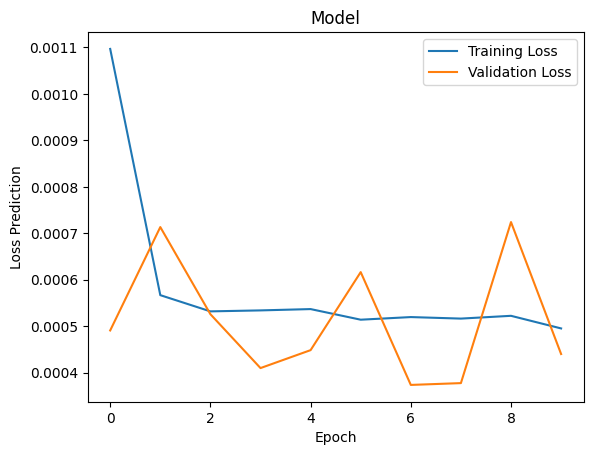

In [ ]:
import matplotlib.pyplot as plt
def stats_reveal (training):
    #Plotting the validation and training curves of loss.
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])


    #Setting the graph labels and tilte.
    plt.title("Model")
    plt.xlabel("Epoch")
    plt.ylabel("Loss Prediction")
    plt.legend(["Training Loss", "Validation Loss"])

    #Outputs the graph.
    plt.show()

#Summons the function to get a visualization on the curves loss.
stats_reveal (training)

90/90 [==============================] - 2s 11ms/step
RSME:  0.14005498210739123


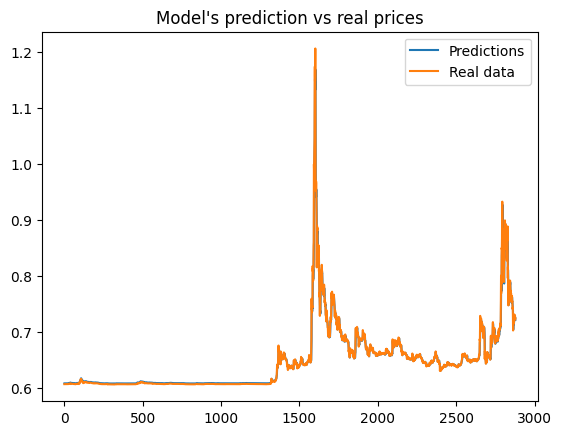

In [ ]:
# activate the model's predictions on the test dataset
prognosis = model_lstm.predict(X_test)

plt.title("Model's prediction vs real prices")

# calculating the (RMSE) to determine accuracy of prediction

rmse = np.sqrt(np.mean(((prognosis - Y_test) ** 2)))
print("RSME: ", rmse)

#Plot : prediction data.
plt.plot(prognosis*factor_scale[20] + shift_info[20])

#Plots : real data.
plt.plot(Y_test*factor_scale[20] + shift_info[20])

#Output graph
plt.legend(["Predictions","Real data"])
plt.show()